In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

# Упражнение 1

In [33]:
def np_check():
    start = time.time()
    x = np.arange(size_of_vec)
    y = np.arange(size_of_vec)
    z = 2*x**2 + 4*y
    return time.time() - start

In [3]:
def py_check():
    start = time.time()
    x = range(size_of_vec)
    y = range(size_of_vec)
    z = [2*x[i]**2 + 4*y[i] for i in range(len(x)) ]
    return time.time() - start

<function matplotlib.pyplot.show(*args, **kw)>

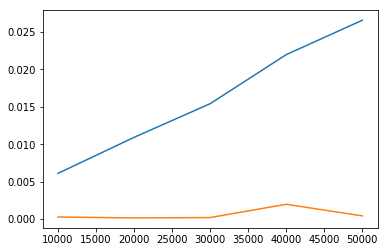

In [4]:
times_py = []
times_np = []
size = [10000, 20000, 30000, 40000, 50000]
for size_of_vec in size:
    median_py = 0
    median_np = 0
    for i in range (5):
        median_py += py_check()/5
        median_np += np_check()/5
    times_py.append(median_py)
    times_np.append(median_np)
plt.plot(size, times_py, size, times_np)
plt.show

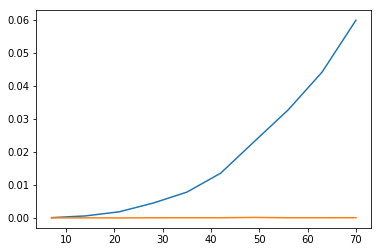

In [5]:
import timeit

def python(n):
    start = time.time()

    A = [[random.random() for j in range(n)] for i in range(n)]
    B = [[random.random() for j in range(n)] for i in range(n)]
    C = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k]*B[k][j]
    return time.time() - start

def numpy(n):
    start = time.time()
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    C=A*B
    return time.time() - start

n = np.arange(7, 77, 7)
tpy = []
tnumpy = []
for i in n:
    a = 0.0
    tpy.append(python(i))
    tnumpy.append(numpy(i))
plt.plot(n, tpy, n, tnumpy)
plt.show()

# Упражнение 2

In [6]:
size = 76
x = np.arange(2, 76, 1)
print(x, "\n")
print(x[x%2 == 1], "\n")
x[x%2 == 1] = -1
print(x)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75] 

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75] 

[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74 -1]


# Упражнение 3

In [7]:
a = np.zeros((10, 2))

b = a.T

print (b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
a = np.arange(6).reshape((3, 2))
print (a)

[[0 1]
 [2 3]
 [4 5]]


In [9]:
print (np.reshape(a, (2, 3)))

[[0 1 2]
 [3 4 5]]


In [10]:
# equivalent to C ravel then C reshape
print (np.reshape(np.ravel(a), (2, 3)))

[[0 1 2]
 [3 4 5]]


In [11]:
# Fortran-like index ordering
print (np.reshape(a, (2, 3), order='F'))

[[0 4 3]
 [2 1 5]]


In [12]:
print (np.reshape(np.ravel(a, order='F'), (2, 3), order='F'))

[[0 4 3]
 [2 1 5]]


In [13]:
a = np.array([[1,2,3], [4,5,6]])
print (np.reshape(a, 6), "\n")
print (np.reshape(a, 6, order='F'))

[1 2 3 4 5 6] 

[1 4 2 5 3 6]


In [14]:
print(np.reshape(a, (3,-1)))

[[1 2]
 [3 4]
 [5 6]]


In [20]:
# Убираем из одного массива элементы другого
a = np.array([1, 2, 3, 4, 5])
b = np.array([1,2,3])
c = np.setdiff1d(a,b)

print(c)

[4 5]


# Упражнение 4

In [32]:
n = random.randint(3, 7)
b = np.random.choice(100, n*n)
c = np.reshape(b, (n, n))
print("Generated array:", c, "\n")

M = np.ma.max(c)
print("Maximum:", M, "\n")

devided = c/M
print("Division:", devided, "\n")

substract = c - c.mean(axis=1).reshape(-1, 1)
print("Substraction:", substract, "\n")

c[c == M] = -1
print("-1:", c)

Generated array: [[27 89  5 18 83 17 78]
 [24 82 41 56  0  7 17]
 [41 87 10 20 95 49 80]
 [86 73 46 18 72 65 73]
 [39 97  9  0 78 35 22]
 [59 21 86 73 65 83 85]
 [63 99 22  9 72 79  0]] 

Maximum: 99 

Division: [[0.27272727 0.8989899  0.05050505 0.18181818 0.83838384 0.17171717
  0.78787879]
 [0.24242424 0.82828283 0.41414141 0.56565657 0.         0.07070707
  0.17171717]
 [0.41414141 0.87878788 0.1010101  0.2020202  0.95959596 0.49494949
  0.80808081]
 [0.86868687 0.73737374 0.46464646 0.18181818 0.72727273 0.65656566
  0.73737374]
 [0.39393939 0.97979798 0.09090909 0.         0.78787879 0.35353535
  0.22222222]
 [0.5959596  0.21212121 0.86868687 0.73737374 0.65656566 0.83838384
  0.85858586]
 [0.63636364 1.         0.22222222 0.09090909 0.72727273 0.7979798
  0.        ]] 

Substraction: [[-18.28571429  43.71428571 -40.28571429 -27.28571429  37.71428571
  -28.28571429  32.71428571]
 [ -8.42857143  49.57142857   8.57142857  23.57142857 -32.42857143
  -25.42857143 -15.42857143]
 [-13.

# Упражнение 5

In [22]:
n = random.randint(3, 7)
x = np.reshape(np.random.choice(10, n*n), (n, n))
np.savetxt('test.txt', x)

In [23]:
print(np.loadtxt('test.txt'))

[[9. 4. 8. 9. 5.]
 [8. 0. 4. 1. 5.]
 [2. 0. 9. 1. 8.]
 [0. 5. 8. 6. 8.]
 [3. 8. 6. 2. 8.]]


# Упражнение 6

In [31]:
def getnearpos(array, value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

x = np.random.randint(0, 100, 10)
print(x)
c = random.randint(0, 99) + random.random()
print(c)
print(getnearpos(x, c))

[52  8 35 23 19  8 19 30 41  6]
67.91910941861788
52
